In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv("Clean2019Data.csv")
dataset.shape

(254972, 21)

In [3]:
train, test = train_test_split(dataset, test_size = 0.2)

### Creating oversampling data

In [4]:
HD_0, HD_1 = train['HeartDiseaseorAttack'].value_counts()

HD_class_0 = train[train['HeartDiseaseorAttack'] == 0]
HD_class_1 = train[train['HeartDiseaseorAttack'] == 1]

print(f"No Heart Disease: {HD_0}")
print(f"Has Heart Disease: {HD_1}")

# Oversample people with heart disease for test case
df_class_1_over = HD_class_1.sample(HD_0, replace=True)
df_test_over = pd.concat([HD_class_0, df_class_1_over], axis=0)

df_test_over.shape

No Heart Disease: 185631
Has Heart Disease: 18346


(371262, 21)

In [5]:
X_train = df_test_over.iloc[:,1:]
y_train = df_test_over[['HeartDiseaseorAttack']]

X_test = test.iloc[:,1:]
y_test = test[['HeartDiseaseorAttack']]

## Using Logistic Regression without oversampling

In [6]:
lr = LogisticRegression(solver = 'lbfgs', max_iter= 254972)

In [7]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]
train_response.shape

(203977, 1)

In [8]:
test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]
test_response.shape

(50995, 1)

Logistic Regression gives a score of 0.9119655647450448 for the train set.
Logistic Regression gives a score of 0.9113442494362193 for the test set.


<AxesSubplot:>

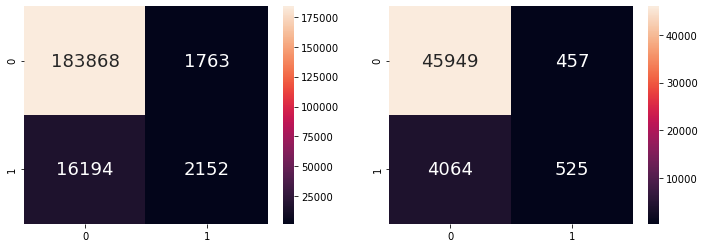

In [9]:
lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression gives a score of {lr.score(train_predictors, train_response)} for the train set.")

LR_noOver_score = lr.score(test_predictors, test_response)
print(f"Logistic Regression gives a score of {LR_noOver_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_train_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_train_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [10]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

LR_noOver_tpr = TPR[1]

print(f"The true positive rate is: {LR_noOver_tpr}")

The true positive rate is: 0.11440400958814556


## Logistic Regression with oversampling

Logistic Regression gives a score of 0.7712666526603854 for the train set.
Logistic Regression gives a score of 0.752073732718894 for the test set.


<AxesSubplot:>

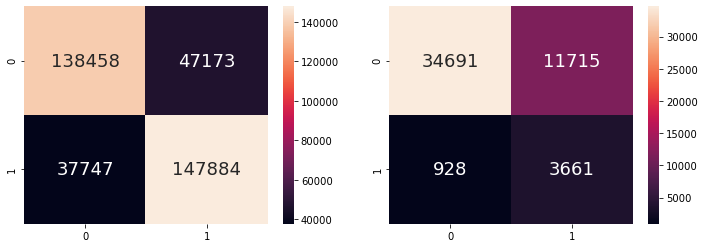

In [11]:
train_predictors = X_train
train_response = y_train

test_predictors = X_test
test_response = y_test

lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression gives a score of {lr.score(train_predictors, train_response)} for the train set.")


LR_Over_score = lr.score(test_predictors, test_response)
print(f"Logistic Regression gives a score of {LR_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_train_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_train_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [12]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

LR_Over_tpr = TPR[1]

print(f"The true positive rate is: {LR_Over_tpr}")

The true positive rate is: 0.7977772935280018


## Decision tree with no oversampling

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9110193796359394

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9107951759976468



<AxesSubplot:>

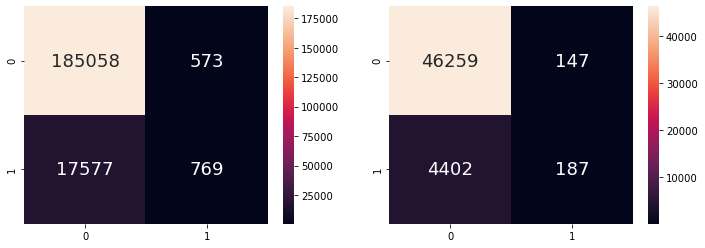

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(train_predictors, train_response)    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_predictors)
y_test_pred = dectree.predict(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_noOver_score = dectree.score(test_predictors, test_response)
print("Classification Accuracy \t:", DT_noOver_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_response, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_noOver = confusion_matrix(test_response, y_test_pred)
sb.heatmap(cm_DT_noOver, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [14]:
CM_test = confusion_matrix(test_response, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

DT_noOver_tpr = TPR[1]

print(f"The true positive rate is: {DT_noOver_tpr}")

The true positive rate is: 0.04074961865330137


# Oversampling with decision tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7327817013322129

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6425139719580351



<AxesSubplot:>

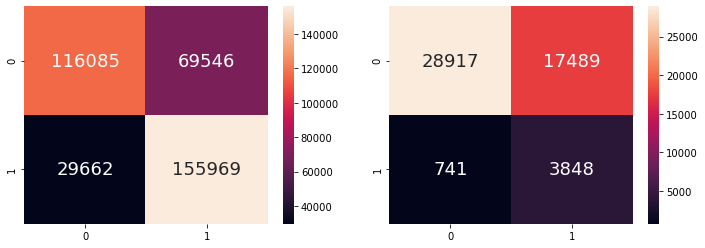

In [15]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_Over_score = dectree.score(X_test, y_test)
print("Classification Accuracy \t:", DT_Over_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_Over = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_DT_Over, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [16]:
CM_test = confusion_matrix(y_test, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

DT_Over_tpr = TPR[1]

print(f"The true positive rate is: {DT_Over_tpr}")

The true positive rate is: 0.8385269121813032


## Using SMOTE

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

Logistic Regression with 1 Predictor gives a score of 0.757172271791352 for the test set.


<AxesSubplot:>

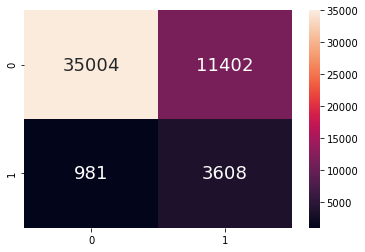

In [18]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

sm = SMOTE(sampling_strategy = 'minority')
Xsm_train, ysm_train = sm.fit_resample(train_predictors, train_response)

smote = LogisticRegression(solver='lbfgs', max_iter= 254972).fit(Xsm_train, ysm_train.values.ravel())

smote_pred = smote.predict(X_test)

# Checking accuracy
smote_score = accuracy_score(test_response, smote_pred)
print(f"Logistic Regression with 1 Predictor gives a score of {smote_score} for the test set.")
cm_smote = confusion_matrix(test_response, smote_pred)
sb.heatmap(cm_smote, annot = True, fmt=".0f", annot_kws={"size": 18})

In [19]:
CM_test = confusion_matrix(test_response, smote_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

smote_tpr = TPR[1]
print(f"The true positive rate is: {smote_tpr}")

The true positive rate is: 0.7862279363695794


## Comparison of Models

Text(0.5, 1.0, 'SMOTE')

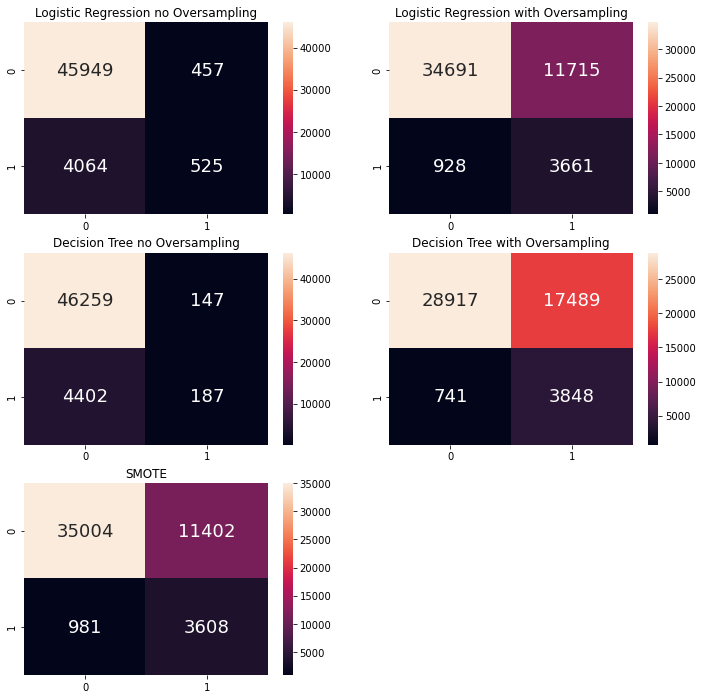

In [23]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
f.delaxes(axes[2,1])

sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_DT_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_DT_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])
sb.heatmap(cm_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][0])

axes[0, 0].set_title("Logistic Regression no Oversampling")
axes[0, 1].set_title("Logistic Regression with Oversampling")
axes[1, 0].set_title("Decision Tree no Oversampling")
axes[1, 1].set_title("Decision Tree with Oversampling")
axes[2, 0].set_title("SMOTE")

In [21]:
print(f"Logistic Regression no Oversampling Classification Accuracy: {LR_noOver_score}, true positive rate is: {LR_noOver_tpr}")
print(f"Logistic Regression with Oversampling Classification Accuracy: {LR_Over_score}, true positive rate is: {LR_Over_tpr}")
print(f"Decision Tree no Oversampling Classification Accuracy: {DT_noOver_score}, true positive rate is: {DT_noOver_tpr}")
print(f"Decision Tree with Oversampling Classification Accuracy: {DT_Over_score}, true positive rate is: {DT_Over_tpr}")
print(f"SMOTE Classification Accuracy: {smote_score}, true positive rate is: {smote_tpr}")

Logistic Regression no Oversampling Classification Accuracy: 0.9113442494362193, true positive rate is: 0.11440400958814556
Logistic Regression with Oversampling Classification Accuracy: 0.752073732718894, true positive rate is: 0.7977772935280018
Decision Tree no Oversampling Classification Accuracy: 0.9107951759976468, true positive rate is: 0.04074961865330137
Decision Tree with Oversampling Classification Accuracy: 0.6425139719580351, true positive rate is: 0.8385269121813032
SMOTE Classification Accuracy: 0.757172271791352, true positive rate is: 0.7862279363695794
